## GREMLIN dataset

This dataset is from this link: https://mountainscholar.org/handle/10217/235392

and licensed CC:BY for the most part.

Paper on the UNEt they used is here: https://journals.ametsoc.org/view/journals/apme/60/1/jamc-d-20-0084.1.xml?tab_body=pdf

In [1]:
import xarray as xr #have to install the python netCDF reader as well
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from platform import python_version

print(python_version())

3.8.10


# Loading in the netCDF

In [3]:
data = 'gremlin_conus2_dataset.nc'

In [4]:
ds = xr.open_dataset(data)

In [5]:
ds

<xarray.Dataset>
Dimensions:         (nsamples: 2246, ny: 256, nx: 256)
Dimensions without coordinates: nsamples, ny, nx
Data variables:
    latitude        (nsamples, ny, nx) float32 ...
    longitude       (nsamples, ny, nx) float32 ...
    time            (nsamples) datetime64[ns] ...
    MRMS_REFC       (nsamples, ny, nx) float32 ...
    GOES_ABI_C07    (nsamples, ny, nx) float32 ...
    GOES_ABI_C09    (nsamples, ny, nx) float32 ...
    GOES_ABI_C13    (nsamples, ny, nx) float32 ...
    GOES_GLM_GROUP  (nsamples, ny, nx) float32 ...
Attributes: (12/13)
    author:             Kyle Hilburn
    title:              GREMLIN CONUS2 Dataset
    description:        This is the dataset used to train and test the GREMLI...
    funding:            GOES-R Program Award NA19OAR4320073
    keywords:           GOES-R, GOES-16, ABI, GLM, MRMS, infrared brightness ...
    spatial_coverage:   Latitude 29.577 to 48.002 degrees_north, Longitude -1...
    ...                 ...
    publications:       Hilburn, Kyle A., Imme Ebert-Uphoff, and Steven D. Mi...
    department:         Cooperative Institute for Research in the Atmosphere
    institution:        Colorado State University
    comment:            Samples 0 to 1797 were used for training and samples ...
    history:            Created Wed Jun 15 16:05:16 2022
    dataset_name:       gremlin_conus2_dataset.nc

While this dataset loads in fine, one of the issues with it is the lack of coordinates. Lets try and fix that. Little explainer on the different terminology: https://docs.xarray.dev/en/stable/user-guide/terminology.html

# Let's make some coordiantes

For the 0th time step, lets check out the shape:

In [6]:
np.shape(ds.latitude.data[0])

(256, 256)

Wonder if the data just repeats? Or is different for every slice

Text(0.5, 1.0, 'Longitude')

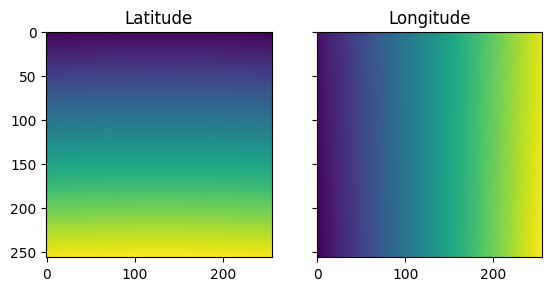

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.imshow(ds.latitude.data[2].data)
ax1.set_title('Latitude')

yo = ax2.imshow(ds.longitude.data[0].data)
ax2.set_title('Longitude')

In [8]:
np.round(ds.latitude.data[10],1)

array([[30.3, 30.3, 30.3, ..., 29.7, 29.7, 29.7],
       [30.4, 30.4, 30.4, ..., 29.7, 29.7, 29.7],
       [30.4, 30.4, 30.4, ..., 29.8, 29.7, 29.7],
       ...,
       [37.1, 37.1, 37.1, ..., 36.4, 36.4, 36.4],
       [37.1, 37.1, 37.1, ..., 36.5, 36.4, 36.4],
       [37.2, 37.2, 37.2, ..., 36.5, 36.5, 36.5]], dtype=float32)

In [9]:
np.round(ds.latitude.data[60],1)

array([[34.6, 34.6, 34.5, ..., 33.5, 33.5, 33.5],
       [34.6, 34.6, 34.6, ..., 33.5, 33.5, 33.5],
       [34.6, 34.6, 34.6, ..., 33.6, 33.6, 33.5],
       ...,
       [41.3, 41.3, 41.3, ..., 40.2, 40.2, 40.2],
       [41.4, 41.4, 41.4, ..., 40.2, 40.2, 40.2],
       [41.4, 41.4, 41.4, ..., 40.2, 40.2, 40.2]], dtype=float32)

From a quick visiual, looks like the latitude changes, but not every step. Feel free to adjust the number above, or to longitude to double check!

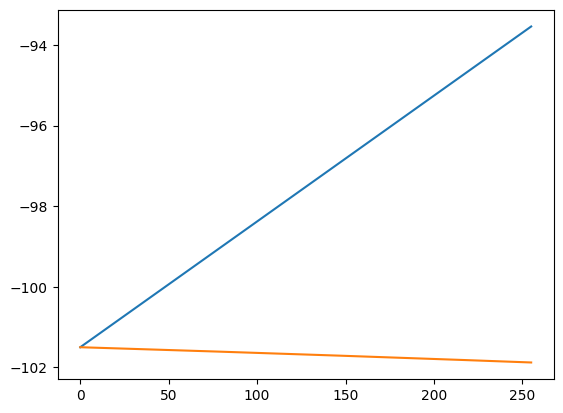

In [10]:
plt.plot(ds.longitude.data[0][0])
plt.plot(ds.longitude.data[0,:,0])

What is the difference beween these two plots?